# Porject : Iris - Classification of flowers 

## Goal : To analysis is to investigate the relationship between sepal and petal dimensions and Iris flower species classification.

### Objectives:


### (Q.1) Exploring the distribution and correlations between sepal length, sepal width, petal length, and petal width.
### (Q.2) Utilizing machine learning algorithms such as logistic regression, decision trees, and k-nearest neighbors to classify Iris flowers based on their morphological attributes.
### (Q.3)Evaluating the predictive performance of each model to determine which features (sepal length, sepal width, petal length, petal width) contribute most significantly to accurate species classification


In [137]:
import pandas as pd # for data processing, I/O csv file
import numpy as np # for linear algebra 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
iris=pd.read_csv(r"C:\Users\arunr\Desktop\ABADS Batch 12\Python\Daniel\CAPSTONE Project\Iris.csv")
iris.head().T

,0,1,2,3,4
Id,1,2,3,4,5
SepalLengthCm,5.1,4.9,4.7,4.6,5.0
SepalWidthCm,3.5,3.0,3.2,3.1,3.6
PetalLengthCm,1.4,1.4,1.3,1.5,1.4
PetalWidthCm,0.2,0.2,0.2,0.2,0.2
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa


## Dataset column informations:

In [138]:
#number of rows and columns
iris.shape


(150, 6)

In [139]:
colmn = iris.columns
for i in colmn:
    print(i)

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


# Data Understanding

In [140]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Preprocessing dataset IRIS_Table 

## STEP :1  Data Cleaning : Remove Column 'Id'

In [141]:
iris.drop(columns = 'Id',inplace =True )

## Checking IRIS-Table after removing column: 'Id' 

In [142]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#  Result : Column 'Id' is successfully removed from the IRIS-Table

## STEP :2 Rename columns

In [153]:
iris.rename({'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'},axis =1,inplace = True)

### Checking info after Column Renaming

In [154]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [155]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## STEP:3 Checking for missing values

In [136]:
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

### Result: No missing values found

## STEP :4 Checking given dataset is balanced or not :
### Get number of elements in each class.

In [157]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Dataset Description summary: 
### There are 5 Atributes.Atribute information is listed below:
### 1. sepal width in cm
### 2. sepal length in cm
### 3. petal width in cm
### 4. petal length in cm
### 5. class : (i) Iris-setosa(50nos.)	(ii) Iris-versicolor(50nos.) (iii)Iris-virginica(50nos.)

# Result: Thus IRIS dataset is a balanced dataset with each class label having equal 50 data points each.

# Data Visualization: 

<Axes: title={'center': 'BOXPLOT - IRIS DATASET'}>

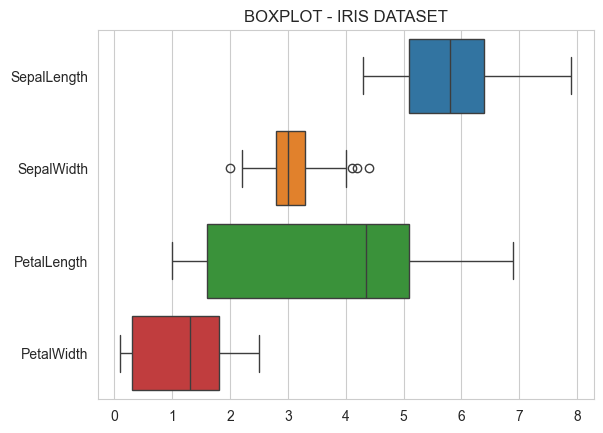

In [159]:
plt.title('BOXPLOT - IRIS DATASET')
sns.boxplot(data = iris,orient = 'h')

# (Q.1) Exploring the distribution and correlations between sepal length, sepal width, petal length, and petal width.

## 2D Pairplot

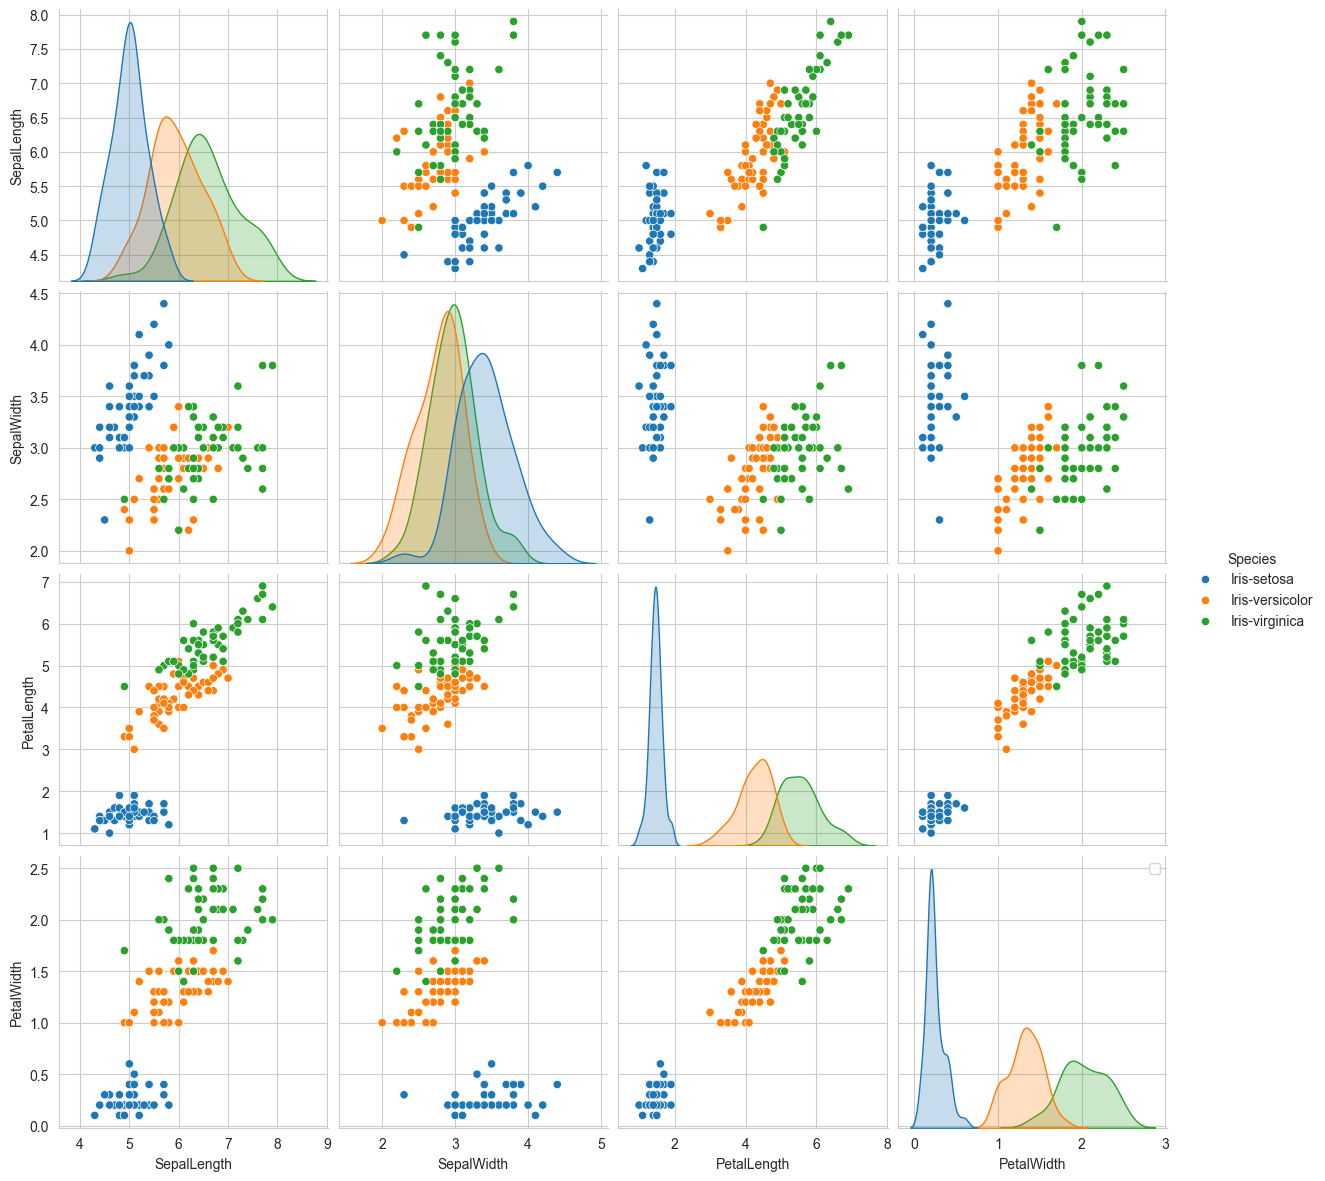

In [160]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='Species',size =3)
plt.legend()
plt.show()

## Observation: 
### 1. All flowers are well separable for PetalLength and PetalWidth
### 2. All types of bits are separable for PetalWidth and SepalWidth

## (Q1.A) Exploring Distribution between sepal length, sepal width, petal length, and petal width?

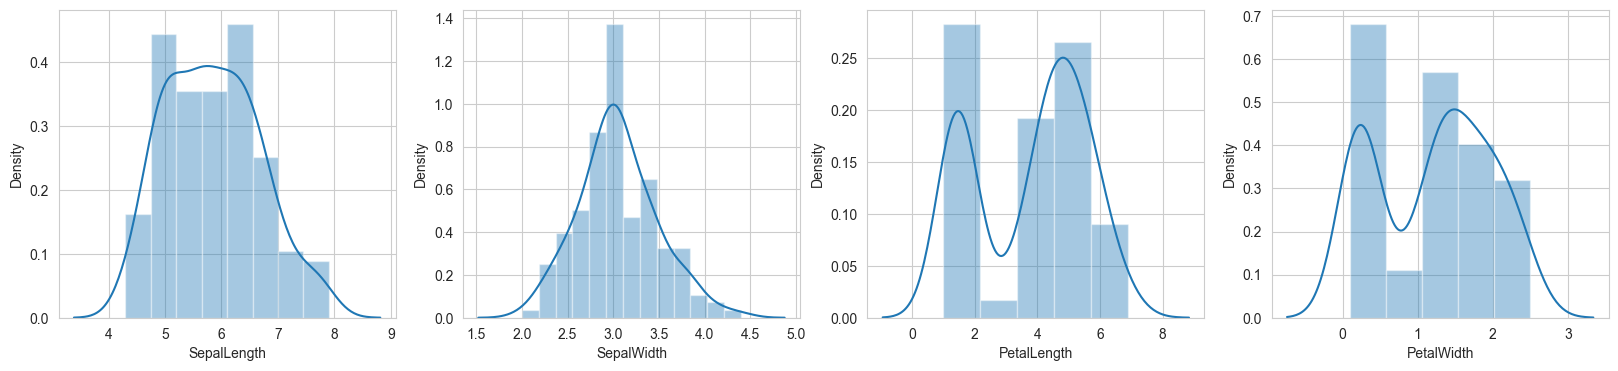

In [167]:
#Distribution plot
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
fig = plt.figure(figsize=(20,4))
i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.distplot(iris[col])
    i+=1
plt.show()

# Observation:
### SepalLength : Maximum distribution is around 5 to 6.5
### SepalWidth : Maximum distribution is around 3
### PetalLength : Maximum distribution is around 5
### PetalWidth : Maximum distribution is around 1.5

## (Q1.B) Exploring Correlation between sepal length, sepal width, petal length, and petal width?

## Correlation:

In [168]:
# Code:
df21 = iris.loc[:,'SepalLength':'PetalWidth']
df21.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


## Heatmap 
### Aim : To find Correlation between attributes.

<Axes: >

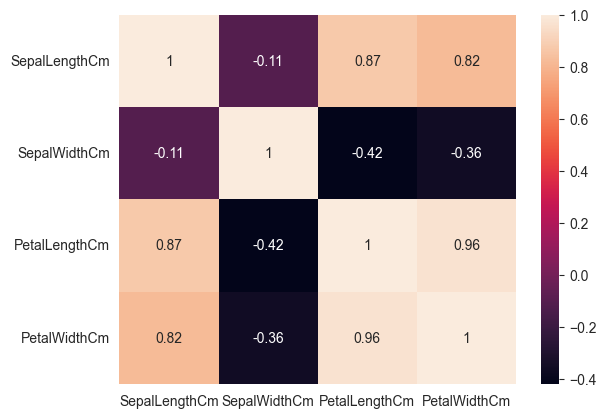

In [84]:
sns.heatmap(df21.corr(),annot=True)

## Result : Correlation values 
### 1. Btw Petal_Width & Petal_Length   = 0.96 ---> Highest correlation value
### 2. Btw Sepal_Length & Petal_Length  = 0.87
### 3. Btw Petal_Width & Sepal_Length   = 0.82

#

# Univariate Analysis - STEP : 1

## (1) Feature : PetalLength

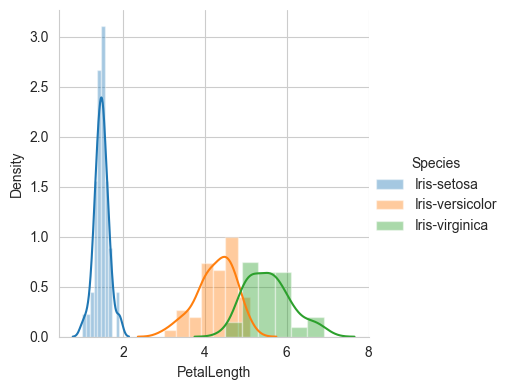

In [171]:
sns.FacetGrid(data = iris, hue='Species', height=4).map(sns.distplot, 'PetalLength').add_legend()

## Observation on Petal_Length : 
### (i) Just using PetalLength we can separate Iris-setosa flowers easily.
### (ii) Iris-versicolor and Iris-virginica partially seperated

## (2) Feature : PetalWidth

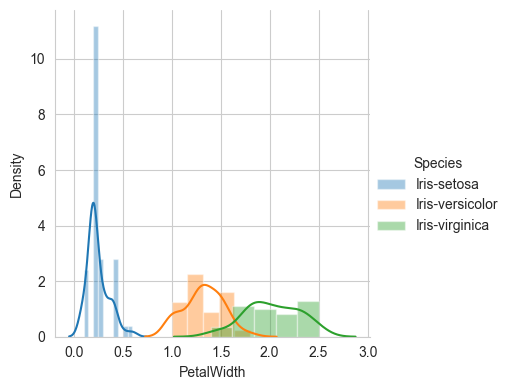

In [172]:
sns.FacetGrid(data = iris, hue='Species', height=4).map(sns.distplot, 'PetalWidth').add_legend()

## Observation on Petal_Width feature:
### (i) Iris-setosa is well separable using PetalWidth
### (ii) Iris-versicolor and Iris-virginica are partially separable using PetalWidth

## (3) Feature : SepallLength

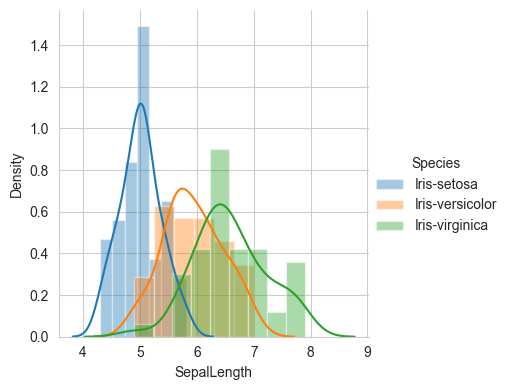

In [169]:
sns.FacetGrid(data = iris, hue='Species', height=4).map(sns.distplot, 'SepalLength').add_legend()

## Observation on Sepal_Length: 
### We cannot separate flowers just using SepalLength alone

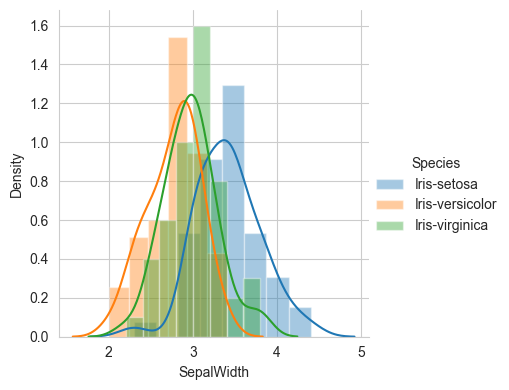

In [170]:
sns.FacetGrid(data = iris, hue='Species', height=4).map(sns.distplot, 'SepalWidth').add_legend()

## Observation on Sepal_Width:
### We cannot separate flowers just using SepalWidth alone

# ANALYSIS - STEP : 2

## (A) BOXPLOT:

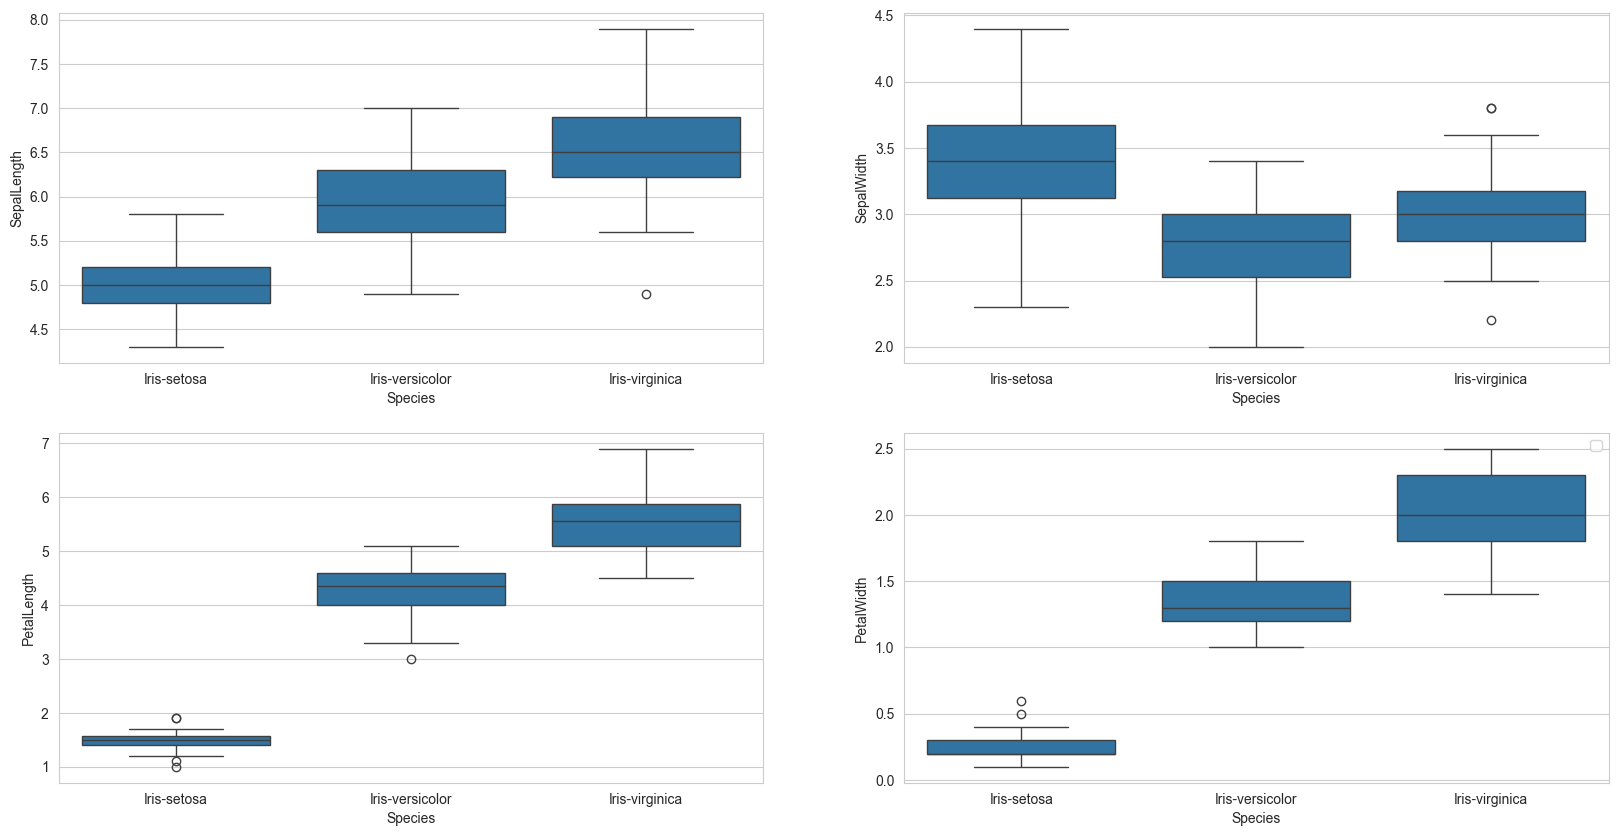

In [184]:
fig, axis = plt.subplots(2, 2, figsize=(20,10))

sns.boxplot(x='Species', y='SepalLength', data=iris, ax=axis[0,0])
sns.boxplot(x='Species', y='SepalWidth', data=iris, ax=axis[0,1])
sns.boxplot(x='Species', y='PetalLength', data=iris, ax=axis[1,0])
sns.boxplot(x='Species', y='PetalWidth', data=iris, ax=axis[1,1])
plt.legend()
plt.show()

## Observation:
### (1) Iris-setosa : It usually have smaller features except SepalWidth
### (2) Iris-versicolor : All three features are average
### (3) Iris-virginica : It's having bigger features except SepalWidth


## (B) VIOLIN-PLOT

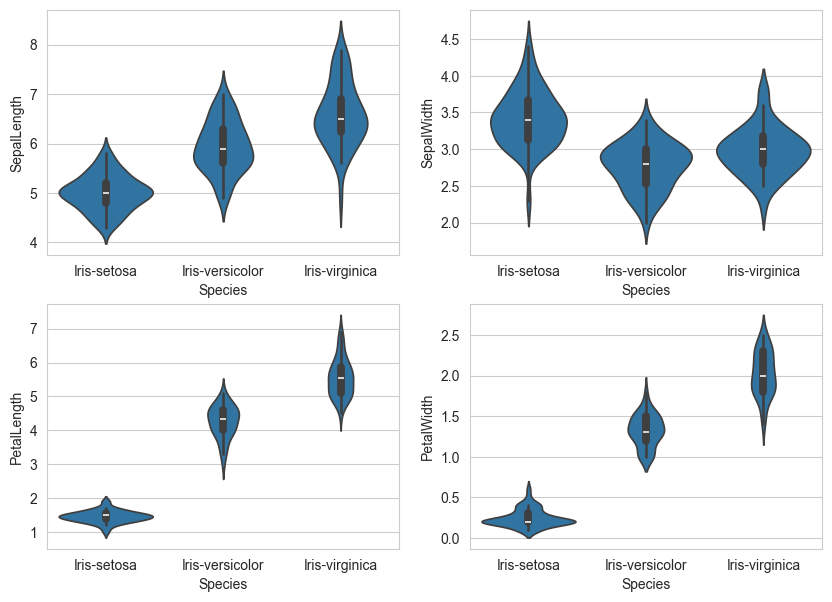

In [188]:
fig,axis =plt.subplots(2,2,figsize=(10,7))

sns.violinplot(x ='Species',y = 'SepalLength', data = iris, ax = axis[0,0])
sns.violinplot(x ='Species',y = 'SepalWidth', data = iris, ax = axis[0,1])
sns.violinplot(x ='Species',y = 'PetalLength', data = iris, ax = axis[1,0])
sns.violinplot(x ='Species',y = 'PetalWidth', data = iris, ax = axis[1,1])

plt.show()

## Observation:

### (1) Iris-versicolor : It's having average features
### (2) Iris-virginica : It's having bigger features except SepalWidth
### (3) Iris-setosa : It usually have smaller features except SepalWidth

# Conculsion :
### (1) Data is balanced
### (2) Strong correlation between PetalLenght and PetalWith
### (3) Iris-Setos is easily separable from other flowers, even using single feature
### (4) Iris-versicolor and Iris-virginica are difficult to seperate just using single feature
 

# (Q.2)Utilizing machine learning algorithms such as logistic regression, decision trees, and k-nearest neighbors to classify Iris flowers based on their morphological attributes?